# Import Module

In [38]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
import warnings
warnings.filterwarnings('ignore')

In [39]:
pd.set_option('display.max_columns', 500)

# Analisis Dan Explorasi Data

In [40]:
df = pd.read_csv('/home/han/Project Raihan/ml-project-template/research/develop/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [41]:
df.shape

(284807, 31)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [43]:
df_missing_column = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_column

,null
Time,0.0
V1,0.0
V2,0.0
V3,0.0
V4,0.0
V5,0.0
V6,0.0
V7,0.0
V8,0.0
V9,0.0


## Mengecek Distribusi Kelas

In [44]:
classes = df['Class'].value_counts()
classes

Class
0    284315
1       492
Name: count, dtype: int64

In [45]:
normal_transaction = round((classes[0]/df['Class'].count() * 100),2)
normal_transaction

np.float64(99.83)

In [46]:
fraud_transaction = round((classes[1]/df['Class'].count() * 100), 2)
fraud_transaction

np.float64(0.17)

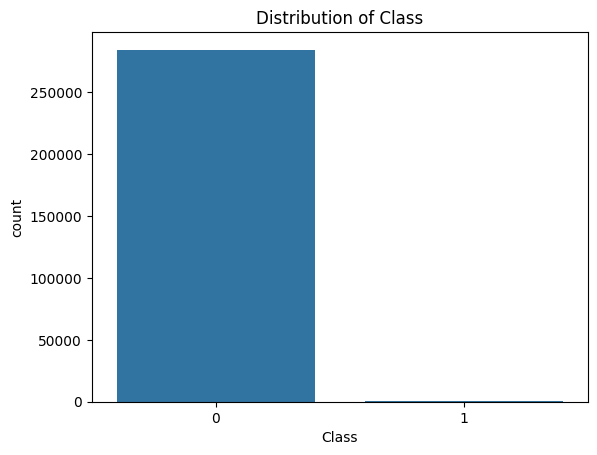

In [47]:
sns.countplot(x="Class", data=df)
plt.title('Distribution of Class')
plt.show()

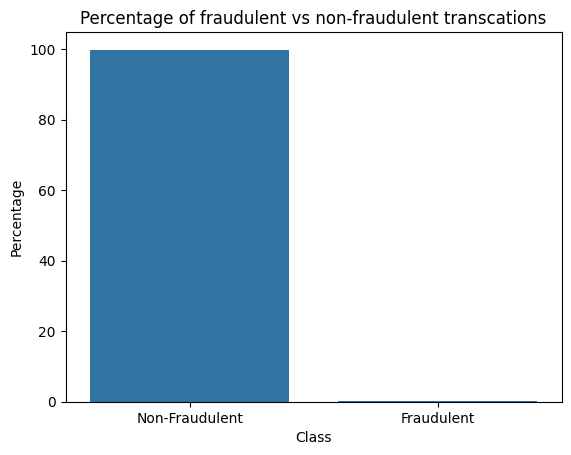

In [48]:
fraud_percentage = {'Class':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[normal_transaction, fraud_transaction]} 
df_fraud_percentage = pd.DataFrame(fraud_percentage) 
sns.barplot(x='Class',y='Percentage', data=df_fraud_percentage)
plt.title('Percentage of fraudulent vs non-fraudulent transcations')
plt.show()


## Observasi Distribusi Classs Pada Feature Time

In [49]:
data_fraud = df[df['Class'] == 1]
data_normal = df[df['Class'] == 0]


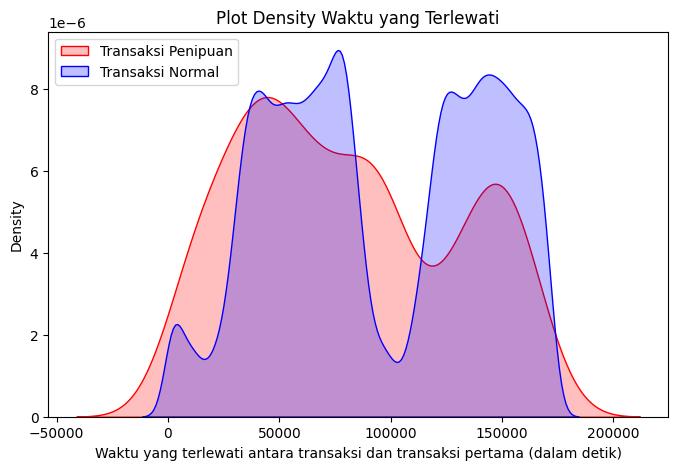

In [50]:
# Set figure size
plt.figure(figsize=(8, 5))

# Plot the density (KDE) plot for fraudulent and non-fraudulent data
sns.kdeplot(data_fraud['Time'], label='Transaksi Penipuan', shade=True, color='r')
sns.kdeplot(data_normal['Time'], label='Transaksi Normal', shade=True, color='b')

# Add labels and title
plt.xlabel('Waktu yang terlewati antara transaksi dan transaksi pertama (dalam detik)')
plt.title('Plot Density Waktu yang Terlewati')

# Display the plot
plt.legend()
plt.show()

<Axes: xlabel='Time', ylabel='Density'>

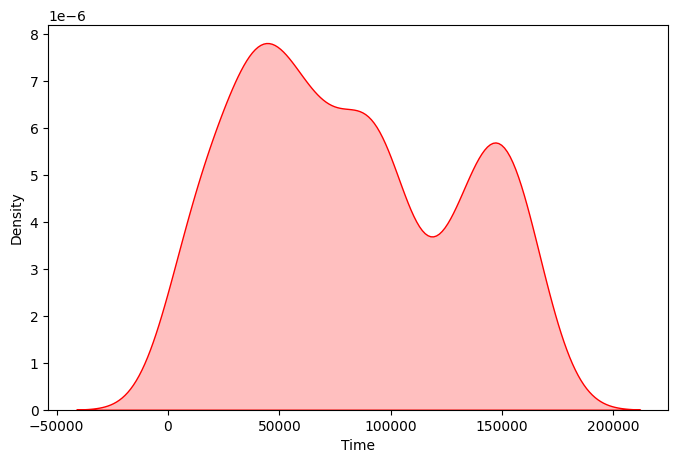

In [51]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data_fraud['Time'], label="Transaksi Penipuan", shade=True, color='r')

<Axes: xlabel='Time', ylabel='Density'>

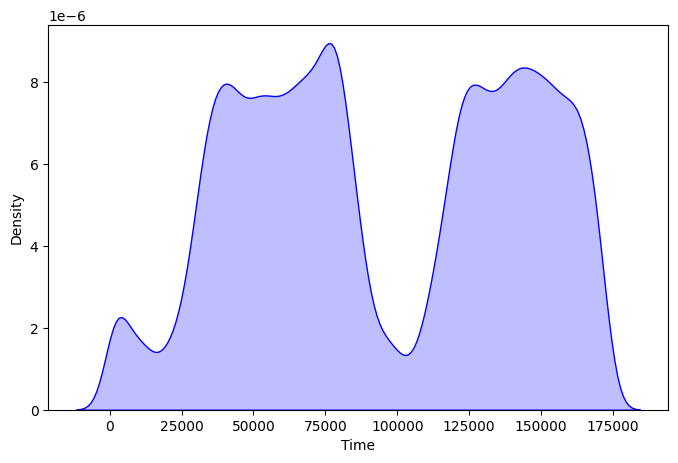

In [52]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data_normal['Time'], label="Transaksi Penipuan", shade=True, color='b')

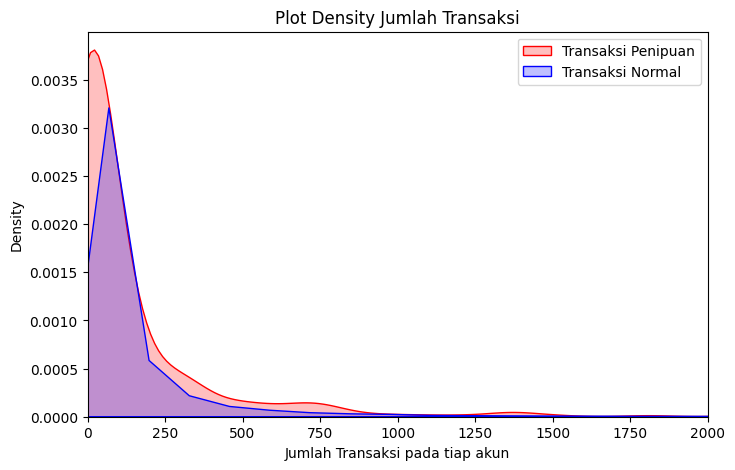

In [53]:
# Set figure size
plt.figure(figsize=(8, 5))

# Plot the density (KDE) plot for fraudulent and non-fraudulent data
sns.kdeplot(data_fraud['Amount'], label='Transaksi Penipuan', shade=True, color='r')
sns.kdeplot(data_normal['Amount'], label='Transaksi Normal', shade=True, color='b')

# Add labels and title
plt.xlabel('Jumlah Transaksi pada tiap akun')
plt.title('Plot Density Jumlah Transaksi')

# Batasi sumbu x hingga 2000
plt.xlim(0, 2000)

# Display the plot
plt.legend()
plt.show()

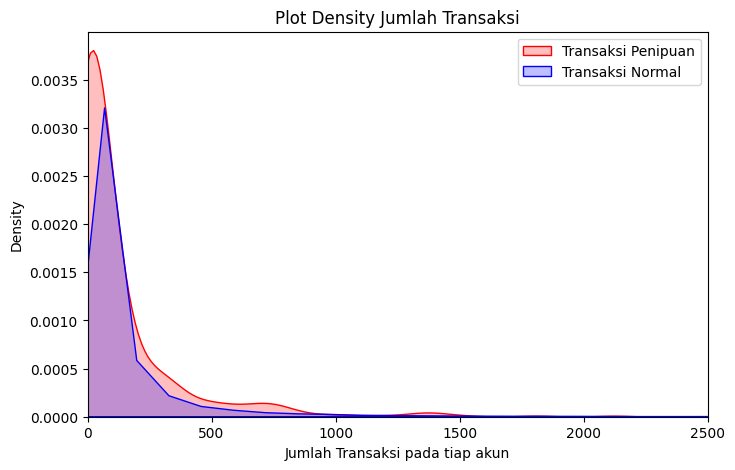

In [54]:
# Set figure size
plt.figure(figsize=(8, 5))

# Plot the density (KDE) plot for fraudulent and non-fraudulent data
sns.kdeplot(data_fraud['Amount'], label='Transaksi Penipuan', shade=True, color='r')
sns.kdeplot(data_normal['Amount'], label='Transaksi Normal', shade=True, color='b')

# Add labels and title
plt.xlabel('Jumlah Transaksi pada tiap akun')
plt.title('Plot Density Jumlah Transaksi')

# Batasi sumbu x hingga 2000
plt.xlim(0, 2500)

# Display the plot
plt.legend()
plt.show()

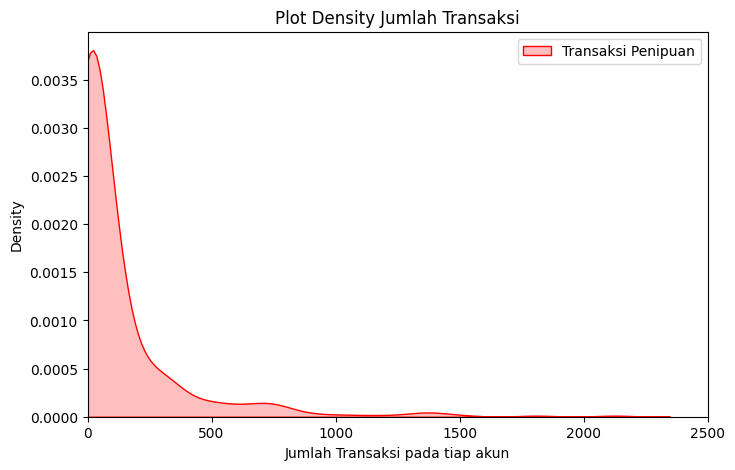

In [55]:
# Set figure size
plt.figure(figsize=(8, 5))

# Plot the density (KDE) plot for fraudulent and non-fraudulent data
sns.kdeplot(data_fraud['Amount'], label='Transaksi Penipuan', shade=True, color='r')


# Add labels and title
plt.xlabel('Jumlah Transaksi pada tiap akun')
plt.title('Plot Density Jumlah Transaksi')

# Batasi sumbu x hingga 2000
plt.xlim(0, 2500)

# Display the plot
plt.legend()
plt.show()

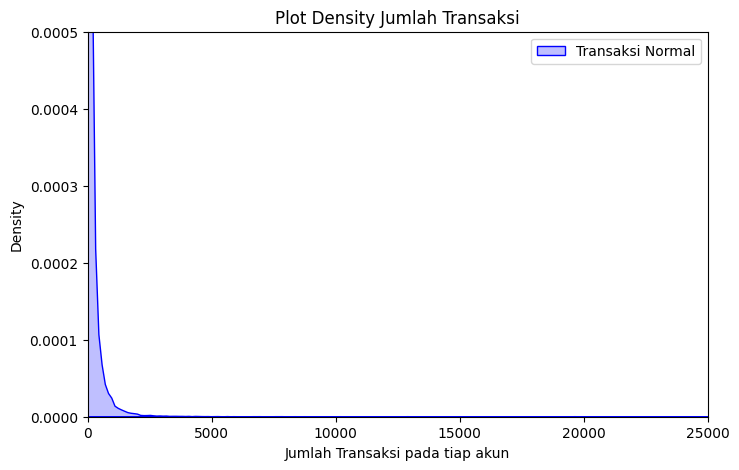

In [56]:
# Set figure size
plt.figure(figsize=(8, 5))

# Plot the density (KDE) plot for fraudulent and non-fraudulent data
sns.kdeplot(data_normal['Amount'], label='Transaksi Normal', shade=True, color='b')


# Add labels and title
plt.xlabel('Jumlah Transaksi pada tiap akun')
plt.title('Plot Density Jumlah Transaksi')

# Batasi sumbu x hingga 2000
plt.xlim(0, 25000)
plt.ylim(0,0.00050)

# Display the plot
plt.legend()
plt.show()

## Train Test Split

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X = df.drop(['Class'], axis=1)
X


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [59]:
y = df['Class']
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, stratify=y, random_state=42)

In [61]:

# Check count distribution in the original dataset
print("Original Distribution (Counts):")
print(y.value_counts())

# Check count distribution in the training set
print("\nTraining Set Distribution (Counts):")
print(pd.Series(y_train).value_counts())

# Check count distribution in the test set
print("\nTest Set Distribution (Counts):")
print(pd.Series(y_test).value_counts())


Original Distribution (Counts):
Class
0    284315
1       492
Name: count, dtype: int64

Training Set Distribution (Counts):
Class
0    227451
1       394
Name: count, dtype: int64

Test Set Distribution (Counts):
Class
0    56864
1       98
Name: count, dtype: int64


## Feature Scaling

In [62]:
from sklearn.preprocessing import RobustScaler  # type: ignore


In [63]:
scaler = RobustScaler()

In [64]:
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
265518,161919.0,1.946747,-0.752526,-1.355130,-0.661630,1.502822,4.024933,-1.479661,1.139880,1.406819,-0.157403,-0.113729,0.510277,0.061258,-0.066555,1.328702,0.352514,-0.765670,0.141938,-0.451365,-0.134435,0.076197,0.297537,0.307915,0.690980,-0.350316,-0.388907,0.077641,-0.032248,7.32
180305,124477.0,2.035149,-0.048880,-3.058693,0.247945,2.943487,3.298697,-0.002192,0.674782,0.045826,0.284864,-0.254903,0.325560,-0.405327,0.721068,-0.148445,-0.754029,-0.270842,-0.695698,-0.274411,-0.227279,0.038628,0.228197,0.035542,0.707090,0.512885,-0.471198,0.002520,-0.069002,2.99
42664,41191.0,-0.991920,0.603193,0.711976,-0.992425,-0.825838,1.956261,-2.212603,-5.037523,0.000772,-2.009561,-0.386845,1.820161,0.747777,0.122746,-1.723285,1.123344,-0.724616,0.147255,0.004631,1.280856,-2.798352,0.109526,-0.436530,-0.932803,0.826684,0.913773,0.038049,0.185340,175.10
198723,132624.0,2.285718,-1.500239,-0.747565,-1.668119,-1.394143,-0.350339,-1.427984,0.010010,-1.118447,1.756121,0.093136,-0.722450,-0.468757,-0.195288,-0.638683,-0.065888,0.072781,0.768237,0.257424,-0.490642,-0.139670,0.077013,0.208310,-0.538236,-0.278032,-0.162068,0.018045,-0.063005,6.10
82325,59359.0,-0.448747,-1.011440,0.115903,-3.454854,0.715771,-0.147490,0.504347,-0.113817,-0.044782,-0.558955,-0.251076,-0.054708,-0.782698,0.134659,-0.483007,-2.096099,-0.399525,1.597589,-0.082746,-0.275297,-0.243245,-0.173298,-0.006692,-1.362383,-0.292234,-0.144622,-0.032580,-0.064194,86.10


In [65]:
X_test.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
263020,160760.0,-0.674466,1.408105,-1.110622,-1.328366,1.388996,-1.308439,1.885879,-0.614233,0.311652,0.650757,-0.857785,-0.229961,-0.199817,0.266371,-0.046544,-0.741398,-0.605617,-0.392568,-0.162648,0.394322,0.080084,0.810034,-0.224327,0.707899,-0.135837,0.045102,0.533837,0.291319,23.00
11378,19847.0,-2.829816,-2.765149,2.537793,-1.074580,2.842559,-2.153536,-1.795519,-0.250020,3.073504,-1.000418,1.850842,-1.549779,1.252337,0.963974,-0.481027,-0.147319,-0.209328,1.058898,0.397057,-0.515765,-0.295555,0.109305,-0.813272,0.042996,-0.027660,-0.910247,0.110802,-0.511938,11.85
147283,88326.0,-3.576495,2.318422,1.306985,3.263665,1.127818,2.865246,1.444125,-0.718922,1.874046,7.398491,2.081146,-0.064145,0.577556,-2.430201,1.505993,-1.237941,-0.390405,-1.231804,0.098738,2.034786,-1.060151,0.016867,-0.132058,-1.483996,-0.296011,0.062823,0.552411,0.509764,76.07
219439,141734.0,2.060386,-0.015382,-1.082544,0.386019,-0.024331,-1.074935,0.207792,-0.338140,0.455091,0.047859,-0.652497,0.750829,0.665603,0.158608,0.027348,-0.171173,-0.291228,-1.008531,0.097040,-0.192024,-0.281684,-0.639426,0.331818,-0.067584,-0.283675,0.203529,-0.063621,-0.060077,0.99
36939,38741.0,1.209965,1.384303,-1.343531,1.763636,0.662351,-2.113384,0.854039,-0.475963,-0.629658,-1.579654,1.462573,0.208823,0.734537,-3.538625,0.926076,0.835029,2.845937,1.040947,-1.045263,0.009083,-0.164015,-0.328294,-0.154631,0.619449,0.818998,-0.330525,0.046884,0.104527,1.50


In [66]:
X_train[['Time', 'Amount']] = scaler.fit_transform(X_train[['Time', 'Amount']])
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
265518,0.905774,1.946747,-0.752526,-1.355130,-0.661630,1.502822,4.024933,-1.479661,1.139880,1.406819,-0.157403,-0.113729,0.510277,0.061258,-0.066555,1.328702,0.352514,-0.765670,0.141938,-0.451365,-0.134435,0.076197,0.297537,0.307915,0.690980,-0.350316,-0.388907,0.077641,-0.032248,-0.204315
180305,0.465984,2.035149,-0.048880,-3.058693,0.247945,2.943487,3.298697,-0.002192,0.674782,0.045826,0.284864,-0.254903,0.325560,-0.405327,0.721068,-0.148445,-0.754029,-0.270842,-0.695698,-0.274411,-0.227279,0.038628,0.228197,0.035542,0.707090,0.512885,-0.471198,0.002520,-0.069002,-0.264579
42664,-0.512286,-0.991920,0.603193,0.711976,-0.992425,-0.825838,1.956261,-2.212603,-5.037523,0.000772,-2.009561,-0.386845,1.820161,0.747777,0.122746,-1.723285,1.123344,-0.724616,0.147255,0.004631,1.280856,-2.798352,0.109526,-0.436530,-0.932803,0.826684,0.913773,0.038049,0.185340,2.130828
198723,0.561678,2.285718,-1.500239,-0.747565,-1.668119,-1.394143,-0.350339,-1.427984,0.010010,-1.118447,1.756121,0.093136,-0.722450,-0.468757,-0.195288,-0.638683,-0.065888,0.072781,0.768237,0.257424,-0.490642,-0.139670,0.077013,0.208310,-0.538236,-0.278032,-0.162068,0.018045,-0.063005,-0.221294
82325,-0.298886,-0.448747,-1.011440,0.115903,-3.454854,0.715771,-0.147490,0.504347,-0.113817,-0.044782,-0.558955,-0.251076,-0.054708,-0.782698,0.134659,-0.483007,-2.096099,-0.399525,1.597589,-0.082746,-0.275297,-0.243245,-0.173298,-0.006692,-1.362383,-0.292234,-0.144622,-0.032580,-0.064194,0.892136


In [67]:
X_test[['Time', 'Amount']] = scaler.transform(X_test[['Time', 'Amount']])
X_test.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
263020,0.892161,-0.674466,1.408105,-1.110622,-1.328366,1.388996,-1.308439,1.885879,-0.614233,0.311652,0.650757,-0.857785,-0.229961,-0.199817,0.266371,-0.046544,-0.741398,-0.605617,-0.392568,-0.162648,0.394322,0.080084,0.810034,-0.224327,0.707899,-0.135837,0.045102,0.533837,0.291319,0.013918
11378,-0.762991,-2.829816,-2.765149,2.537793,-1.074580,2.842559,-2.153536,-1.795519,-0.250020,3.073504,-1.000418,1.850842,-1.549779,1.252337,0.963974,-0.481027,-0.147319,-0.209328,1.058898,0.397057,-0.515765,-0.295555,0.109305,-0.813272,0.042996,-0.027660,-0.910247,0.110802,-0.511938,-0.141267
147283,0.041357,-3.576495,2.318422,1.306985,3.263665,1.127818,2.865246,1.444125,-0.718922,1.874046,7.398491,2.081146,-0.064145,0.577556,-2.430201,1.505993,-1.237941,-0.390405,-1.231804,0.098738,2.034786,-1.060151,0.016867,-0.132058,-1.483996,-0.296011,0.062823,0.552411,0.509764,0.752540
219439,0.668683,2.060386,-0.015382,-1.082544,0.386019,-0.024331,-1.074935,0.207792,-0.338140,0.455091,0.047859,-0.652497,0.750829,0.665603,0.158608,0.027348,-0.171173,-0.291228,-1.008531,0.097040,-0.192024,-0.281684,-0.639426,0.331818,-0.067584,-0.283675,0.203529,-0.063621,-0.060077,-0.292415
36939,-0.541064,1.209965,1.384303,-1.343531,1.763636,0.662351,-2.113384,0.854039,-0.475963,-0.629658,-1.579654,1.462573,0.208823,0.734537,-3.538625,0.926076,0.835029,2.845937,1.040947,-1.045263,0.009083,-0.164015,-0.328294,-0.154631,0.619449,0.818998,-0.330525,0.046884,0.104527,-0.285317


# Membuat Model Dengan Data Tidak Seimbang

In [68]:
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors

def inverse_frequency_oversampling(data, labels, minority_class=1, n_neighbors=5, noise_scale=0.1, random_state=None):
    """
    Balances the dataset by oversampling the minority class.

    Args:
        data: The input dataset as a pandas DataFrame or NumPy array.
        labels: The class labels corresponding to the dataset (as a pandas Series or NumPy array).
        minority_class: The label of the minority class to oversample.
        n_neighbors: The number of nearest neighbors to consider.
        noise_scale: The standard deviation of the noise added to generate synthetic data.
        random_state: An integer for reproducibility or None for random behavior.

    Returns:
        A tuple containing the oversampled data and labels as NumPy arrays.
    """
    # Set the random state for reproducibility
    rng = np.random.default_rng(random_state)

    # Ensure that data is a NumPy array if it's a pandas DataFrame
    if isinstance(data, pd.DataFrame):
        data = data.values

    # Ensure that labels is a NumPy array if it's a pandas Series
    if isinstance(labels, pd.Series):
        labels = labels.values

    # Separate majority and minority classes
    minority_data = data[labels == minority_class]
    majority_data = data[labels != minority_class]

    # Fit Nearest Neighbors on the minority class data
    nbrs = NearestNeighbors(n_neighbors=n_neighbors, algorithm='ball_tree').fit(minority_data)

    synthetic_data = []
    target_count = len(majority_data) - len(minority_data)  # Number of synthetic samples needed
    for _ in range(target_count):
        # Randomly select a minority point
        point_idx = rng.integers(0, len(minority_data))
        point = minority_data[point_idx]

        # Find nearest neighbor
        distances, indices = nbrs.kneighbors([point])
        neighbor_idx = rng.choice(indices[0])  # Randomly select a neighbor
        neighbor = minority_data[neighbor_idx]

        # Generate synthetic sample
        noise = rng.normal(scale=noise_scale, size=point.shape)
        synthetic_point = (point + neighbor) / 2 + noise
        synthetic_data.append(synthetic_point)

    # Combine original data with synthetic data
    synthetic_data = np.array(synthetic_data)
    oversampled_data = np.vstack((data, synthetic_data))
    oversampled_labels = np.hstack((labels, np.full(len(synthetic_data), minority_class)))

    return oversampled_data, oversampled_labels



In [69]:
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.ensemble import IsolationForest
from sklearn.feature_selection import mutual_info_classif

def custom_oversampling(data, labels, minority_class=1, n_neighbors=5, noise_scale=0.1, random_state=None):
    """
    Balances the dataset by oversampling the minority class with dynamic density-based sample generation,
    ensuring all minority class data, including potential outliers, are retained.
    
    Args:
        data: The input dataset as a pandas DataFrame or NumPy array.
        labels: The class labels corresponding to the dataset (as a pandas Series or NumPy array).
        minority_class: The label of the minority class to oversample.
        n_neighbors: The number of nearest neighbors to consider for density-based sampling.
        noise_scale: The standard deviation of the noise added to generate synthetic data.
        random_state: An integer for reproducibility or None for random behavior.

    Returns:
        A tuple containing the oversampled data and labels as NumPy arrays.
    """
    # Set the random state for reproducibility
    rng = np.random.default_rng(random_state)

    # Ensure that data is a NumPy array if it's a pandas DataFrame
    if isinstance(data, pd.DataFrame):
        data = data.values

    # Ensure that labels is a NumPy array if it's a pandas Series
    if isinstance(labels, pd.Series):
        labels = labels.values

    # Separate majority and minority classes
    minority_data = data[labels == minority_class]
    majority_data = data[labels != minority_class]

    # Step 1: Density estimation using Nearest Neighbors
    nbrs = NearestNeighbors(n_neighbors=n_neighbors, algorithm='ball_tree').fit(minority_data)
    distances, _ = nbrs.kneighbors(minority_data)
    density_scores = np.mean(distances, axis=1)  # Smaller mean distance → Higher density

    # Step 2: Feature importance scaling
    feature_importances = mutual_info_classif(data, labels, random_state=random_state)
    feature_weights = feature_importances / feature_importances.sum()

    # Step 3: Outlier detection using Isolation Forest (influence sampling but do not remove)
    isolation_forest = IsolationForest(contamination=0.05, random_state=random_state)
    isolation_forest.fit(minority_data)  # Fit the Isolation Forest model
    outlier_scores = -isolation_forest.decision_function(minority_data)  # Negative scores indicate outliers
    sampling_weights = 1 / (1 + outlier_scores)  # Lower weight for points likely to be outliers
    sampling_weights /= sampling_weights.sum()  # Normalize weights

    # Retrain NearestNeighbors on the entire minority class
    nbrs = NearestNeighbors(n_neighbors=n_neighbors, algorithm='ball_tree').fit(minority_data)

    # Step 4: Synthetic sample generation
    synthetic_data = []
    target_count = len(majority_data) - len(minority_data)  # Number of synthetic samples needed

    for _ in range(target_count):
        # Select a minority point based on combined density and outlier weights
        combined_weights = sampling_weights / (density_scores + 1e-5)
        combined_weights /= combined_weights.sum()
        point_idx = rng.choice(len(minority_data), p=combined_weights)
        point = minority_data[point_idx]

        # Select a neighbor dynamically based on local density
        local_k = max(2, int(n_neighbors * (1 - density_scores[point_idx])))  # Fewer neighbors for sparse regions
        distances, indices = nbrs.kneighbors([point], n_neighbors=local_k)
        neighbor_idx = rng.choice(indices[0])
        neighbor = minority_data[neighbor_idx]

        # Generate a synthetic sample
        interpolation = rng.uniform(0, 1)
        synthetic_point = point + interpolation * (neighbor - point)

        # Add weighted noise based on feature importance
        noise = rng.normal(scale=noise_scale, size=synthetic_point.shape) * feature_weights
        synthetic_point += noise

        synthetic_data.append(synthetic_point)

    # Combine original data with synthetic data
    synthetic_data = np.array(synthetic_data)
    oversampled_data = np.vstack((data, synthetic_data))
    oversampled_labels = np.hstack((labels, np.full(len(synthetic_data), minority_class)))

    return oversampled_data, oversampled_labels


In [70]:
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.ensemble import IsolationForest
from sklearn.feature_selection import mutual_info_classif

def custom_oversampling_2(data, labels, minority_class=1, n_neighbors=5, noise_scale=0.1, random_state=None):
    """
    Balances the dataset by oversampling the minority class with dynamic density-based sample generation.
    
    Args:
        data: The input dataset as a pandas DataFrame or NumPy array.
        labels: The class labels corresponding to the dataset (as a pandas Series or NumPy array).
        minority_class: The label of the minority class to oversample.
        n_neighbors: The number of nearest neighbors to consider for density-based sampling.
        noise_scale: The standard deviation of the noise added to generate synthetic data.
        random_state: An integer for reproducibility or None for random behavior.

    Returns:
        A tuple containing the oversampled data and labels as NumPy arrays.
    """
    # Set the random state for reproducibility
    rng = np.random.default_rng(random_state)

    # Ensure that data is a NumPy array if it's a pandas DataFrame
    if isinstance(data, pd.DataFrame):
        data = data.values

    # Ensure that labels is a NumPy array if it's a pandas Series
    if isinstance(labels, pd.Series):
        labels = labels.values

    # Separate majority and minority classes
    minority_data = data[labels == minority_class]
    majority_data = data[labels != minority_class]

    # Step 1: Density estimation using Nearest Neighbors
    nbrs = NearestNeighbors(n_neighbors=n_neighbors, algorithm='ball_tree').fit(minority_data)
    distances, _ = nbrs.kneighbors(minority_data)
    density_scores = np.mean(distances, axis=1)  # Smaller mean distance → Higher density

    # Step 2: Feature importance scaling
    feature_importances = mutual_info_classif(data, labels, random_state=random_state)
    feature_weights = feature_importances / feature_importances.sum()

    # Step 3: Outlier detection using Isolation Forest
    isolation_forest = IsolationForest(contamination=0.05, random_state=random_state)
    outlier_flags = isolation_forest.fit_predict(minority_data)
    non_outliers = minority_data[outlier_flags == 1]
    density_scores = density_scores[outlier_flags == 1]  # Align density_scores with non_outliers

    # Retrain NearestNeighbors on non-outliers
    nbrs = NearestNeighbors(n_neighbors=n_neighbors, algorithm='ball_tree').fit(non_outliers)

    # Step 4: Synthetic sample generation
    synthetic_data = []
    target_count = len(majority_data) - len(minority_data)  # Number of synthetic samples needed

    for _ in range(target_count):
        # Select a minority point based on density (lower density → higher chance)
        probs = 1 / (density_scores + 1e-5)  # Add small constant to avoid division by zero
        probs /= probs.sum()
        point_idx = rng.choice(len(non_outliers), p=probs)
        point = non_outliers[point_idx]

        # Select a neighbor dynamically based on local density
        local_k = max(2, int(n_neighbors * (1 - density_scores[point_idx])))  # Fewer neighbors for sparse regions
        distances, indices = nbrs.kneighbors([point], n_neighbors=local_k)
        neighbor_idx = rng.choice(indices[0])
        neighbor = non_outliers[neighbor_idx]

        # Generate a synthetic sample
        interpolation = rng.uniform(0, 1)
        synthetic_point = point + interpolation * (neighbor - point)

        # Add weighted noise based on feature importance
        noise = rng.normal(scale=noise_scale, size=synthetic_point.shape) * feature_weights
        synthetic_point += noise

        synthetic_data.append(synthetic_point)

    # Combine original datax with synthetic data
    synthetic_data = np.array(synthetic_data)
    oversampled_data = np.vstack((data, synthetic_data))
    oversampled_labels = np.hstack((labels, np.full(len(synthetic_data), minority_class)))

    return oversampled_data, oversampled_labels

In [71]:
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.ensemble import IsolationForest
from sklearn.feature_selection import mutual_info_classif

def custom_oversampling_3(data, labels, minority_class=1, n_neighbors=5, noise_scale=0.1, random_state=None):
    """
    Balances the dataset by oversampling the minority class with dynamic density-based sample generation.
    
    Args:
        data: The input dataset as a pandas DataFrame or NumPy array.
        labels: The class labels corresponding to the dataset (as a pandas Series or NumPy array).
        minority_class: The label of the minority class to oversample.
        n_neighbors: The number of nearest neighbors to consider for density-based sampling.
        noise_scale: The standard deviation of the noise added to generate synthetic data.
        random_state: An integer for reproducibility or None for random behavior.

    Returns:
        A tuple containing the oversampled data and labels as NumPy arrays.
    """
    # Set the random state for reproducibility
    rng = np.random.default_rng(random_state)

    # Ensure that data is a NumPy array if it's a pandas DataFrame
    if isinstance(data, pd.DataFrame):
        data = data.values

    # Ensure that labels is a NumPy array if it's a pandas Series
    if isinstance(labels, pd.Series):
        labels = labels.values

    # Separate majority and minority classes
    minority_data = data[labels == minority_class]
    majority_data = data[labels != minority_class]

    # Step 1: Density estimation using Nearest Neighbors (Fixed Density Score)
    nbrs = NearestNeighbors(n_neighbors=n_neighbors + 1, algorithm='ball_tree').fit(minority_data)
    distances, _ = nbrs.kneighbors(minority_data)
    
    # Corrected density score: inverse of sum of distances (excluding self)
    density_scores = n_neighbors / (np.sum(distances[:, 1:], axis=1) + 1e-5)

    # Step 2: Feature importance scaling
    feature_importances = mutual_info_classif(data, labels, random_state=random_state)
    feature_weights = feature_importances / feature_importances.sum()

    # Step 3: Outlier detection using Isolation Forest
    isolation_forest = IsolationForest(contamination=0.05, random_state=random_state)
    outlier_flags = isolation_forest.fit_predict(minority_data)
    non_outliers = minority_data[outlier_flags == 1]
    density_scores = density_scores[outlier_flags == 1]  # Align density_scores with non_outliers

    # Retrain NearestNeighbors on non-outliers
    nbrs = NearestNeighbors(n_neighbors=n_neighbors, algorithm='ball_tree').fit(non_outliers)

    # Step 4: Synthetic sample generation
    synthetic_data = []
    target_count = len(majority_data) - len(minority_data)  # Number of synthetic samples needed

    for _ in range(target_count):
        # Select a minority point based on density (higher density → higher chance)
        probs = density_scores / density_scores.sum()  # Normalize probabilities
        point_idx = rng.choice(len(non_outliers), p=probs)
        point = non_outliers[point_idx]

        # Select a neighbor dynamically based on local density
        local_k = max(2, int(n_neighbors * (density_scores[point_idx])))  # Fewer neighbors for sparse regions
        distances, indices = nbrs.kneighbors([point], n_neighbors=local_k)
        neighbor_idx = rng.choice(indices[0])
        neighbor = non_outliers[neighbor_idx]

        # Generate a synthetic sample
        interpolation = rng.uniform(0, 1)
        synthetic_point = point + interpolation * (neighbor - point)

        # Add weighted noise based on feature importance
        noise = rng.normal(scale=noise_scale, size=synthetic_point.shape) * feature_weights
        synthetic_point += noise

        synthetic_data.append(synthetic_point)

    # Combine original data with synthetic data
    synthetic_data = np.array(synthetic_data)
    oversampled_data = np.vstack((data, synthetic_data))
    oversampled_labels = np.hstack((labels, np.full(len(synthetic_data), minority_class)))

    return oversampled_data, oversampled_labels


In [72]:
def custom_oversampling_4(data, labels, minority_class=1, n_neighbors=5, noise_scale=0.1, random_state=None):
    """
    Balances the dataset by oversampling the minority class with dynamic density-based sample generation.
    
    Args:
        data: The input dataset as a pandas DataFrame or NumPy array.
        labels: The class labels corresponding to the dataset (as a pandas Series or NumPy array).
        minority_class: The label of the minority class to oversample.
        n_neighbors: The number of nearest neighbors to consider for density-based sampling.
        noise_scale: The standard deviation of the noise added to generate synthetic data.
        random_state: An integer for reproducibility or None for random behavior.

    Returns:
        A tuple containing the oversampled data and labels as NumPy arrays.
    """
    # Set the random state for reproducibility
    rng = np.random.default_rng(random_state)

    # Ensure that data is a NumPy array if it's a pandas DataFrame
    if isinstance(data, pd.DataFrame):
        data = data.values

    # Ensure that labels is a NumPy array if it's a pandas Series
    if isinstance(labels, pd.Series):
        labels = labels.values

    # Separate majority and minority classes
    minority_data = data[labels == minority_class]
    majority_data = data[labels != minority_class]

    # Step 1: Density estimation using Nearest Neighbors (Fixed Density Score)
    nbrs = NearestNeighbors(n_neighbors=n_neighbors + 1, algorithm='ball_tree').fit(minority_data)
    distances, _ = nbrs.kneighbors(minority_data)
    
    # Corrected density score: inverse of sum of distances (excluding self)
    density_scores = n_neighbors / (np.sum(distances[:, 1:], axis=1) + 1e-5)

    # Step 2: Feature importance scaling
    feature_importances = mutual_info_classif(data, labels, random_state=random_state)
    feature_weights = feature_importances / feature_importances.sum()

    # Step 3: Outlier detection using Isolation Forest
    isolation_forest = IsolationForest(contamination=0.05, random_state=random_state)
    outlier_flags = isolation_forest.fit_predict(minority_data)
    non_outliers = minority_data[outlier_flags == 1]
    density_scores = density_scores[outlier_flags == 1]  # Align density_scores with non_outliers

    # Retrain NearestNeighbors on non-outliers
    nbrs = NearestNeighbors(n_neighbors=n_neighbors, algorithm='ball_tree').fit(non_outliers)

    # Step 4: Synthetic sample generation
    synthetic_data = []
    target_count = len(majority_data) - len(minority_data)  # Number of synthetic samples needed

    for _ in range(target_count):
        # Select a minority point based on density (higher density → higher chance)
        probs = density_scores / density_scores.sum()  # Normalize probabilities
        point_idx = rng.choice(len(non_outliers), p=probs)
        point = non_outliers[point_idx]

        # Select a neighbor dynamically based on local density
        # Normalize density scores to [0, 1]
        min_density = density_scores.min()
        max_density = density_scores.max()
        norm_density_scores = (density_scores - min_density) / (max_density - min_density + 1e-10)
        # Now use norm_density_scores in place of density_scores:
        local_k = max(2, int(n_neighbors * (1 - norm_density_scores[point_idx])))

        distances, indices = nbrs.kneighbors([point], n_neighbors=local_k)
        neighbor_idx = rng.choice(indices[0])
        neighbor = non_outliers[neighbor_idx]

        # Generate a synthetic sample
        interpolation = rng.uniform(0, 1)
        synthetic_point = point + interpolation * (neighbor - point)

        # Add weighted noise based on feature importance
        noise = rng.normal(scale=noise_scale, size=synthetic_point.shape) * feature_weights
        synthetic_point += noise

        synthetic_data.append(synthetic_point)

    # Combine original data with synthetic data
    synthetic_data = np.array(synthetic_data)
    oversampled_data = np.vstack((data, synthetic_data))
    oversampled_labels = np.hstack((labels, np.full(len(synthetic_data), minority_class)))

    return oversampled_data, oversampled_labels

In [73]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, matthews_corrcoef, roc_auc_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler # type: ignore

# Define oversampling methods
methods = {
    "Custom Oversampling": lambda X, y: custom_oversampling_4(X, y, minority_class=1, random_state=42),
    "SMOTE": SMOTE(random_state=42),
    "ADASYN": ADASYN(random_state=42),
    "Random Oversampling": RandomOverSampler(random_state=42),
}

# Dictionary to store results
results = {}

# Compare each oversampling method
for method_name, oversampler in methods.items():
    if method_name == "Custom Oversampling":
        # Apply custom oversampling
        X_resampled, y_resampled = oversampler(X_train, y_train)
    else:
        # Apply standard oversampling methods
        X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)
    
    # Train a RandomForestClassifier
    model = RandomForestClassifier(random_state=42)
    model.fit(X_resampled, y_resampled)
    
    # Evaluate on the test set
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # Store metrics
    results[method_name] = {
        "F1-Score": classification_report(y_test, y_pred, output_dict=True)["1"]["f1-score"],
        "AUC-ROC": roc_auc_score(y_test, y_proba),
        "Precision": classification_report(y_test, y_pred, output_dict=True)["1"]["precision"],
        "Recall": classification_report(y_test, y_pred, output_dict=True)["1"]["recall"],
        "MCC": matthews_corrcoef(y_test, y_pred),  
    }


# Display results
results_df = pd.DataFrame(results).T
print(results_df)

                     F1-Score   AUC-ROC  Precision    Recall       MCC
Custom Oversampling  0.869565  0.959717   0.930233  0.816327  0.871216
SMOTE                0.849741  0.973375   0.863158  0.836735  0.849589
ADASYN               0.840426  0.969371   0.877778  0.806122  0.840926
Random Oversampling  0.847458  0.962821   0.949367  0.765306  0.852162


In [36]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, matthews_corrcoef, roc_auc_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler # type: ignore

# Define oversampling methods
methods = {
    "Custom Oversampling": lambda X, y: custom_oversampling_3(X, y, minority_class=1, random_state=42),
    "SMOTE": SMOTE(random_state=42),
    "ADASYN": ADASYN(random_state=42),
    "Random Oversampling": RandomOverSampler(random_state=42),
}

# Dictionary to store results
results = {}

# Compare each oversampling method
for method_name, oversampler in methods.items():
    if method_name == "Custom Oversampling":
        # Apply custom oversampling
        X_resampled, y_resampled = oversampler(X_train, y_train)
    else:
        # Apply standard oversampling methods
        X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)
    
    # Train a RandomForestClassifier
    model = RandomForestClassifier(random_state=42)
    model.fit(X_resampled, y_resampled)
    
    # Evaluate on the test set
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # Store metrics
    results[method_name] = {
        "F1-Score": classification_report(y_test, y_pred, output_dict=True)["1"]["f1-score"],
        "AUC-ROC": roc_auc_score(y_test, y_proba),
        "Precision": classification_report(y_test, y_pred, output_dict=True)["1"]["precision"],
        "Recall": classification_report(y_test, y_pred, output_dict=True)["1"]["recall"],
        "MCC": matthews_corrcoef(y_test, y_pred),  
    }


# Display results
results_df = pd.DataFrame(results).T
print(results_df)

                     F1-Score   AUC-ROC  Precision    Recall       MCC
Custom Oversampling  0.854054  0.965240   0.908046  0.806122  0.855336
SMOTE                0.849741  0.973375   0.863158  0.836735  0.849589
ADASYN               0.840426  0.969371   0.877778  0.806122  0.840926
Random Oversampling  0.847458  0.962821   0.949367  0.765306  0.852162


In [102]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, matthews_corrcoef, roc_auc_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler # type: ignore

# Define oversampling methods
methods = {
    "Custom Oversampling": lambda X, y: custom_oversampling_2(X, y, minority_class=1, random_state=42),
    "SMOTE": SMOTE(random_state=42),
    "ADASYN": ADASYN(random_state=42),
    "Random Oversampling": RandomOverSampler(random_state=42),
}

# Dictionary to store results
results = {}

# Compare each oversampling method
for method_name, oversampler in methods.items():
    if method_name == "Custom Oversampling":
        # Apply custom oversampling
        X_resampled, y_resampled = oversampler(X_train, y_train)
    else:
        # Apply standard oversampling methods
        X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)
    
    # Train a RandomForestClassifier
    model = RandomForestClassifier(random_state=42)
    model.fit(X_resampled, y_resampled)
    
    # Evaluate on the test set
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # Store metrics
    results[method_name] = {
        "F1-Score": classification_report(y_test, y_pred, output_dict=True)["1"]["f1-score"],
        "AUC-ROC": roc_auc_score(y_test, y_proba),
        "Precision": classification_report(y_test, y_pred, output_dict=True)["1"]["precision"],
        "Recall": classification_report(y_test, y_pred, output_dict=True)["1"]["recall"],
        "MCC": matthews_corrcoef(y_test, y_pred),  
    }


# Display results
results_df = pd.DataFrame(results).T
print(results_df)

                     F1-Score   AUC-ROC  Precision    Recall       MCC
Custom Oversampling  0.864865  0.955627   0.919540  0.816327  0.866183
SMOTE                0.849741  0.973375   0.863158  0.836735  0.849589
ADASYN               0.840426  0.969371   0.877778  0.806122  0.840926
Random Oversampling  0.847458  0.962821   0.949367  0.765306  0.852162


In [103]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, matthews_corrcoef, roc_auc_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler

# Define oversampling methods
methods = {
    "Custom Oversampling": lambda X, y: custom_oversampling(X, y, minority_class=1, random_state=42),
    "SMOTE": SMOTE(random_state=42),
    "ADASYN": ADASYN(random_state=42),
    "Random Oversampling": RandomOverSampler(random_state=42),
}

# Dictionary to store results
results = {}

# Compare each oversampling method
for method_name, oversampler in methods.items():
    if method_name == "Custom Oversampling":
        # Apply custom oversampling
        X_resampled, y_resampled = oversampler(X_train, y_train)
    else:
        # Apply standard oversampling methods
        X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)
    
    # Train a RandomForestClassifier
    model = RandomForestClassifier(random_state=42)
    model.fit(X_resampled, y_resampled)
    
    # Evaluate on the test set
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # Store metrics
    results[method_name] = {
        "F1-Score": classification_report(y_test, y_pred, output_dict=True)["1"]["f1-score"],
        "AUC-ROC": roc_auc_score(y_test, y_proba),
        "Precision": classification_report(y_test, y_pred, output_dict=True)["1"]["precision"],
        "Recall": classification_report(y_test, y_pred, output_dict=True)["1"]["recall"],
        "MCC": matthews_corrcoef(y_test, y_pred),  
    }


# Display results
results_df = pd.DataFrame(results).T
print(results_df)

                     F1-Score   AUC-ROC  Precision    Recall       MCC
Custom Oversampling  0.852459  0.965593   0.917647  0.795918  0.854388
SMOTE                0.849741  0.973375   0.863158  0.836735  0.849589
ADASYN               0.840426  0.969371   0.877778  0.806122  0.840926
Random Oversampling  0.847458  0.962821   0.949367  0.765306  0.852162


F1-Score   AUC-ROC  Precision    Recall       MCC
Custom Oversampling  0.794258  0.965107   0.747748  0.846939  0.795428
SMOTE                0.849741  0.973375   0.863158  0.836735  0.849589
ADASYN               0.840426  0.969371   0.877778  0.806122  0.840926
Random Oversampling  0.847458  0.962821   0.949367  0.765306  0.852162

In [104]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, matthews_corrcoef, roc_auc_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler

# Define oversampling methods
methods = {
    "Custom Oversampling": lambda X, y: inverse_frequency_oversampling(X, y, minority_class=1, random_state=42),
    "SMOTE": SMOTE(random_state=42),
    "ADASYN": ADASYN(random_state=42),
    "Random Oversampling": RandomOverSampler(random_state=42),
}

# Dictionary to store results
results = {}

# Compare each oversampling method
for method_name, oversampler in methods.items():
    if method_name == "Custom Oversampling":
        # Apply custom oversampling
        X_resampled, y_resampled = oversampler(X_train, y_train)
    else:
        # Apply standard oversampling methods
        X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)
    
    # Train a RandomForestClassifier
    model = RandomForestClassifier(random_state=42)
    model.fit(X_resampled, y_resampled)
    
    # Evaluate on the test set
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # Store metrics
    results[method_name] = {
        "F1-Score": classification_report(y_test, y_pred, output_dict=True)["1"]["f1-score"],
        "AUC-ROC": roc_auc_score(y_test, y_proba),
        "Precision": classification_report(y_test, y_pred, output_dict=True)["1"]["precision"],
        "Recall": classification_report(y_test, y_pred, output_dict=True)["1"]["recall"],
        "MCC": matthews_corrcoef(y_test, y_pred),  
    }


# Display results
results_df = pd.DataFrame(results).T
print(results_df)


                     F1-Score   AUC-ROC  Precision    Recall       MCC
Custom Oversampling  0.794258  0.965107   0.747748  0.846939  0.795428
SMOTE                0.849741  0.973375   0.863158  0.836735  0.849589
ADASYN               0.840426  0.969371   0.877778  0.806122  0.840926
Random Oversampling  0.847458  0.962821   0.949367  0.765306  0.852162
